In [1]:
# the purpose of this is to conduct ICA for each group of resting-state MRI data
# based on cTBS or sham

In [2]:
# import modules to use
from nilearn.plotting import plot_prob_atlas
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from nilearn.decomposition import DictLearning

import numpy as np
import nibabel as nib
import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import pearsonr

In [3]:
SubInfo = pd.read_excel('/Users/liuq13/Library/CloudStorage/Box-Box/NODEAP_data_analysis/ProcessedData/SubConds.xlsx')
Subs = SubInfo[SubInfo['Include'] == 1]['SubID']
TMS_types = []
for i, row in SubInfo.iterrows():
    tmp_order = row['StimOrder']
    if tmp_order == 123:
        TMS_types.append(['N', 'C', 'S', 'S', 'C', 'S', 'S'])
    elif tmp_order == 132:
        TMS_types.append(['N', 'C', 'S', 'S', 'S', 'S', 'C'])
    elif tmp_order == 213:
        TMS_types.append(['N', 'S', 'C', 'C', 'S', 'S', 'S'])
    elif tmp_order == 231:
        TMS_types.append(['N', 'S', 'C', 'S', 'S', 'C', 'S'])
    elif tmp_order == 312:
        TMS_types.append(['N', 'S', 'S', 'C', 'S', 'S', 'C'])
    elif tmp_order == 321:
        TMS_types.append(['N', 'S', 'S', 'S', 'C', 'C', 'S'])

In [4]:
# Assuming TMS_types is a list of lists where each inner list corresponds to a subject
# Example: TMS_types[j] contains ['N', 'C', 'S', 'S', 'C', 'S', 'S'] for subject j

# Base folder where the NIfTI files are stored
base_nifti_folder = '/Volumes/X9Pro/NODEAP/MRI'
session_folders = ['D0', 'S1D1', 'S1D2', 'S2D1', 'S2D2', 'S3D1', 'S3D2']
nifti_paths_by_tms_type = {'N': [], 'C': [], 'S': []}

# Loop through each subject and their TMS types
for i, subject_id in enumerate(Subs):
    tms_types = TMS_types[i]  
    for j, session in enumerate(session_folders):
        nifti_folder = os.path.join(base_nifti_folder, subject_id, 'nifti', 'functional', session)
        if os.path.exists(nifti_folder):
            files_in_folder = os.listdir(nifti_folder)
            nifti_files = [f for f in files_in_folder if f.startswith('s6w2') and f.endswith('.nii')]
            
            if nifti_files:
                # Assume we're interested in the first matching file if multiple are found
                nifti_file = nifti_files[0]
                nifti_file_path = os.path.join(nifti_folder, nifti_file)
                
                # Assign the NIfTI file path to the corresponding TMS type
                tms_type = tms_types[j]  # Index based on the session number
                nifti_paths_by_tms_type[tms_type].append(nifti_file_path)
            else:
                print(f"No NIfTI file starting with 's6w2' found in {nifti_folder}")
        else:
            print(f"Session folder not found: {nifti_folder}")

# Now, nifti_paths_by_tms_type['N'], nifti_paths_by_tms_type['C'], and nifti_paths_by_tms_type['S']
# contain lists of file paths for the N, C, and S TMS types respectively, across all subjects.

Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_30/nifti/functional/S3D2
Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_83/nifti/functional/S3D1
Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_87/nifti/functional/D0
Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_88/nifti/functional/D0


In [7]:
dict_learning = DictLearning(
    n_components=20,
    smoothing_fwhm=None,  # Set to None as data is already smoothed
    memory="nilearn_cache",
    memory_level=2,
    verbose=1,
    random_state=0,
    n_epochs=1,
    mask_strategy="whole-brain-template",
    standardize="zscore_sample",
    n_jobs=4,
)

output_dir = Path.cwd() / "NODEAP_results" / "plot_compare_decomposition"
output_dir.mkdir(exist_ok=True, parents=True)

In [6]:
for tms_type in ['C', 'S', 'N']:
    # Get the list of NIfTI file paths for the current TMS type
    func_filenames = nifti_paths_by_tms_type[tms_type]
    print("Fitting dictionary learning model")
    dict_learning.fit(func_filenames)
    print("Saving results")

    dictlearning_components_img = dict_learning.components_img_
    output_filename = f"dictionary_learning_resting_state_{tms_type}.nii.gz"  # Save the components
    output_filepath = output_dir / output_filename
    dictlearning_components_img.to_filename(output_filepath)  # Save the NIfTI image to the output directory
    print(f"Output for TMS type '{tms_type}' saved to: {output_filepath}")

Fitting dictionary learning model
[MultiNiftiMasker.fit] Loading data from [/Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S3D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S2D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S3D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S1D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S3D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_09/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_09/nifti/functional/S3D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_10/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_10/nifti/functional/S3D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_12/nifti/functional/S1D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_12/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9P

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:616: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x1252ce980>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:577: JobLibCollisionWarning: Cannot detect name collisions for function 'unknown'
  return self._cached_call(args, kwargs, shelving=False)[0]


[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:813: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x1252ce980>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_39/nifti/functional/S3D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_41/nifti/functional/S2D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_43/nifti/functional/S1D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_41/nifti/functional/S1D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_44/nifti/functional/S1D1/s6w2fvol_4d.nii')
[Mu

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001358, ..., -0.000296],
       ...,
       [-0.002408, ..., -0.000349]], dtype=float32), 
array([[12.393765, ..., 10.436048],
       ...,
       [ 0.99822 , ...,  1.884375]], dtype=float32))
_________________________________________________compute_loadings - 0.5s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.393765, ...,  0.99822 ],
       ...,
       [10.436048, ...,  1.884375]], dtype=float32), 
20, alpha=10, batch_size=20, method='cd', dict_init=array([[0.195515, ..., 0.334341],
       ...,
       [0.190564, ..., 0.29205 ]], dtype=float32), verbose=0, random_state=0, return_c

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:616: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x1252ce980>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_to_img...
resample_to_img(<nibabel.nifti1.Nifti1Image object at 0x125d07800>, <nibabel.nifti1.Nifti1Image object at 0x125c42b10>)
__________________________________________________resample_to_img - 0.4s, 0.0min
_________________________________________________________unknown - 11.8s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:813: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x1252ce980>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_45/nifti/functional/S2D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_48/nifti/functional/S1D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_53/nifti/functional/S1D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_55/nifti/functional/S2D1/s6w2fvol_4d.nii')
[Mu

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.004865, ..., -0.002426],
       ...,
       [ 0.00118 , ...,  0.001705]], dtype=float32), 
array([[ 7.880488, ...,  7.625982],
       ...,
       [-0.764581, ...,  2.203887]], dtype=float32))
_________________________________________________compute_loadings - 1.0s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.880488, ..., -0.764581],
       ...,
       [ 7.625982, ...,  2.203887]], dtype=float32), 
20, alpha=10, batch_size=20, method='cd', dict_init=array([[ 0.147166, ..., -0.428207],
       ...,
       [-0.161768, ..., -0.157616]], dtype=float32), verbose=0, random_state=0, retu

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:616: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x1252ce980>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_to_img...
resample_to_img(<nibabel.nifti1.Nifti1Image object at 0x125d07800>, <nibabel.nifti1.Nifti1Image object at 0x125c17860>)
__________________________________________________resample_to_img - 0.4s, 0.0min
_________________________________________________________unknown - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:813: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x1252ce980>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,



[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_77/nifti/functional/S2D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
_________________________________________________filter_and_mask - 39.5s, 0.7min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._fast_svd...
_fast_svd(array([[-0.781606, ..., -0.659421],
       ...,
       [ 0.490696, ...,  0.666482]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x11B607540)
_________________________________________________________fast_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_masker._filter_and_mask...
_filter_and_mask('/Volumes/X9Pro/NODEAP/MRI/NODEAP_78/nifti/functional/S2D1/s6w2fvol_4d.nii', <nibabel

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001443, ...,  0.001886],
       ...,
       [-0.001987, ..., -0.001653]], dtype=float32), 
array([[10.306672, ...,  4.143313],
       ...,
       [-0.267684, ...,  0.179235]], dtype=float32))
_________________________________________________compute_loadings - 0.3s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.306672, ..., -0.267684],
       ...,
       [ 4.143313, ...,  0.179235]], dtype=float32), 
20, alpha=10, batch_size=20, method='cd', dict_init=array([[-0.074259, ..., -0.132451],
       ...,
       [ 0.011117, ...,  0.020362]], dtype=float32), verbose=0, random_state=0, retu

Plotting components for TMS type: C


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


Plotting components for TMS type: S


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


Plotting components for TMS type: N


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


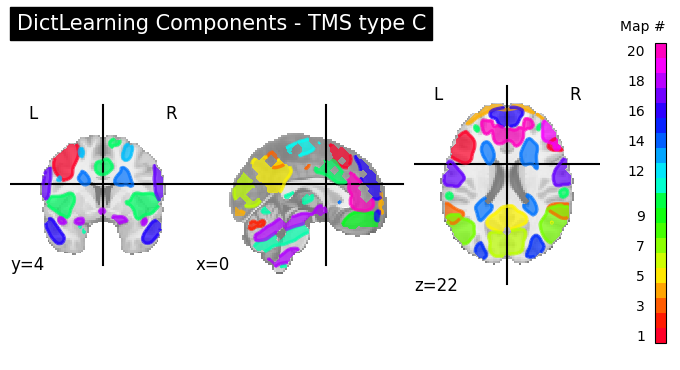

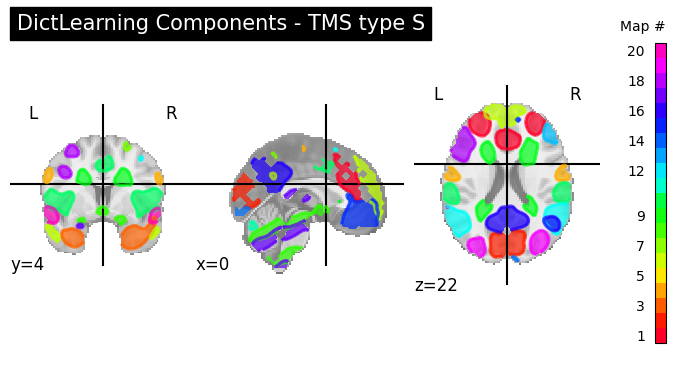

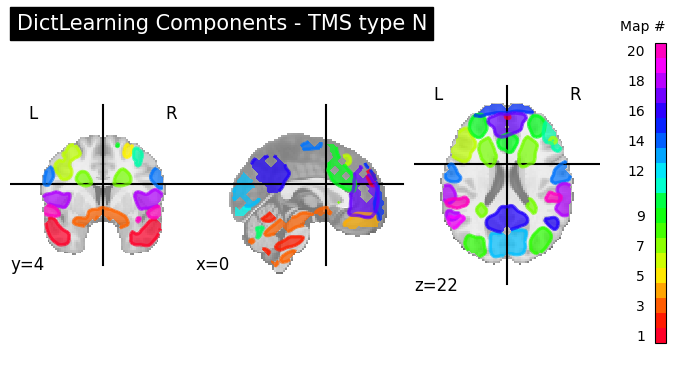

In [7]:
# plot all components of each TMS type
for tms_type in ['C', 'S', 'N']:
    nifti_file = output_dir / f"dictionary_learning_resting_state_{tms_type}.nii.gz"
    dictlearning_components_img = nib.load(nifti_file)
    
    print(f"Plotting components for TMS type: {tms_type}")
    plot_prob_atlas(dictlearning_components_img, 
                    colorbar=True,
                    title=f"DictLearning Components - TMS type {tms_type}")

plt.show()

In [8]:
# Estimate explained variance per component and plot using matplotlib
# The fitted object dict_learning can be used to calculate the score per component

for tms_type in ['C', 'S', 'N']:
    func_filenames = nifti_paths_by_tms_type[tms_type]
    scores = dict_learning.score(func_filenames, per_component=True)
    plt.figure(figsize=(4, 4))
    positions = np.arange(len(scores))
    plt.barh(positions, scores)
    plt.ylabel("Component #", size=12)
    plt.xlabel("Explained variance", size=12)
    plt.yticks(np.arange(20))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%.3f"))
    plt.tight_layout()

show()

ValueError: Object has no components_ attribute. This is probably because fit has not been called.